In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
import ruptures as rpt
import os
newsource={}
keys = "Sample #,Fx,Fy,Fz,Mx,My,Mz,RTA,RSO,LTA,LSO,GO\n"
plot_keys="Fx,Fy,Fz,Mx,My,Mz,RTA,RSO,LTA,LSO,GO".split(",")
print(plot_keys)
length = len(keys)
print("done")

['Fx', 'Fy', 'Fz', 'Mx', 'My', 'Mz', 'RTA', 'RSO', 'LTA', 'LSO', 'GO']
done


In [2]:
#defining the RMS function
def window_rms(a, window_size):
  a2 = np.power(a,2)
  window = np.ones(window_size)/float(window_size)
  return np.sqrt(np.convolve(a2, window, 'valid'))

In [5]:
#creation of the directories (run it only once)
for name in ['new_Healthy','new_LMN_patients','new_UMN_patients']:
    dir_path = r'C:\Users\chihe\datasets\Datasets'+"\\caracteristiques\\"+name
    access_rights = 0o755
    try:
       os.makedirs(dir_path,access_rights)
    except OSError:
        print ("Creation of the directory %s failed" % dir_path)
    else:
        print ("Successfully created the directory %s" % dir_path)

Creation of the directory C:\Users\chihe\datasets\Datasets\caracteristiques\new_Healthy failed
Creation of the directory C:\Users\chihe\datasets\Datasets\caracteristiques\new_LMN_patients failed
Creation of the directory C:\Users\chihe\datasets\Datasets\caracteristiques\new_UMN_patients failed


C:\Users\chihe\datasets\Datasets\new_Healthy\AC16\AC_01.csv
[5005, 5145, 5235, 5390, 5830, 5890, 6220, 6460, 6720, 9575, 9751]


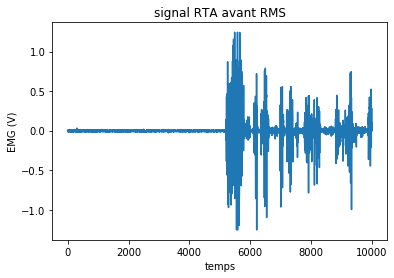

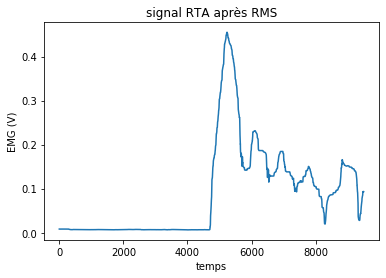

In [12]:
# test and file created to avoid rerunning the files that were done after every error 
# the loop begins from the file that we modify every time an error occurs
test=False
file="AC16"
fles=["JT14","AD_07","JD_10","XK_06","BM15",]
for name in ['new_Healthy','new_LMN_patients','new_UMN_patients']:
    dir_path = r'C:\Users\chihe\datasets\Datasets'+"\\"+name
    for dirname,_,filenames in os.walk(dir_path):
        dic={
        'name':[],
        'duree':[],
        'puiss_rep':[],
        'puiss_act':[],
        'rapport':[]
        }
        if((file in dirname)):
            test=True
        if(not(test)):
            continue
        for filename in filenames:
            pathname=dirname+"\\"+filename
            print(pathname)
            ts=False
            for fle in fles :
                if(fle in pathname):
                    ts=True
            if(ts):
                continue
            data = pd.read_csv(pathname)
            if((not('RTA' in data.keys()))or(not('RSO' in data.keys()))or('recap'in filename)):
                continue
            dic["name"].append(filename[:-4])
            mus='RTA'
            points1 = np.array(data[mus])
            points=window_rms(points1,500)
            model = "l2"  
            algo = rpt.Window(width=40, model=model).fit(points)
            my_bkps = [ i+250 for i in algo.predict(n_bkps=10)]
            print(my_bkps)
            plt.figure()
            plt.title('signal RTA avant RMS')
            plt.xlabel("temps")
            plt.ylabel("EMG (V)")
            plt.plot(points1)
            plt.savefig("temp.png")
            plt.figure()
            plt.title('signal RTA après RMS')
            plt.xlabel("temps")
            plt.ylabel("EMG (V)")
            plt.plot(points)
            plt.savefig("temp1.png")
            #plt.savefig("temp.png")
            #print(my_bkps[0])
            puiss=0
            for i in range(min(my_bkps[0],len(data[mus]))):
                puiss=puiss+data[mus][i]**2
            puiss=puiss/my_bkps[0]
            dic["duree"].append(my_bkps[0])
            dic["puiss_rep"].append(puiss)
            puiss1=0
            for i in range(my_bkps[0],len(data[mus])):
                puiss1=puiss1+data[mus][i]**2
            puiss1=puiss1/(len(data[mus])-my_bkps[0])
            dic["puiss_act"].append(puiss1)
            dic["rapport"].append(puiss1/puiss)
            break
        break
    break
